In [45]:
import matplotlib.pyplot as plt

from skimage import data, io, color
from skimage.filters import threshold_otsu, threshold_local

### Load an image in grayscale

https://www.pexels.com/photo/cathedral-interior-view-705778/

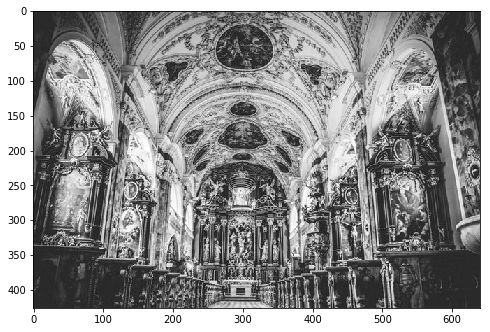

In [46]:
cathedral = color.rgb2gray(io.imread('./images/pexels-painting.jpg'))

plt.figure(figsize=(8,8))
plt.imshow(cathedral, cmap='gray')

In [47]:
cathedral = cathedral * 255

#### Different thresholding algorithms

* Otsu's algorithm tries to find an optimal threshold based on the image
* If the image has a large variation in background intensity then adaptive thresholding algorithms are better

In [52]:
thresh = threshold_otsu(cathedral)
# First run threshold_otsu and then run threshold_local
#thresh = threshold_local(cathedral, block_size=25)

print('Threshold value of this image:', thresh)

Threshold value of this image: 130.1079326171875


Create a binary image from the found thresh value

In [53]:
cathedral_binary = cathedral > thresh

In [54]:
print('binary values of the image \n', cathedral_binary)

binary values of the image 
 [[False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]
 ...
 [False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]]


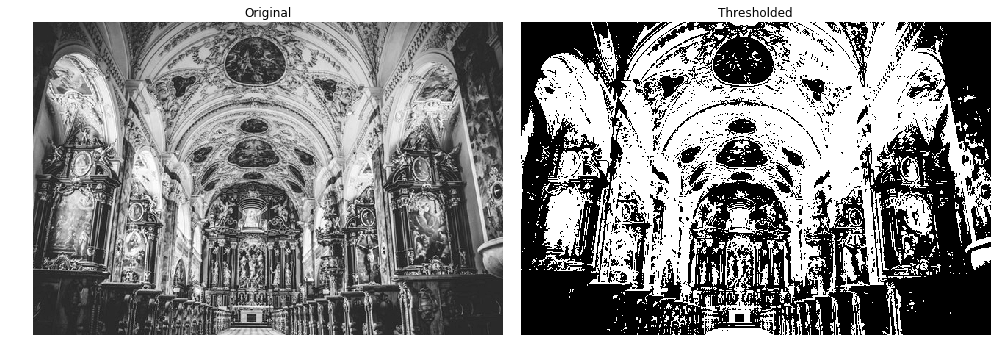

In [55]:
fig, axes = plt.subplots(1, 2, 
                         figsize=(14, 8),
                         sharex=True, sharey=True)
ax = axes.ravel()

ax[0].imshow(cathedral, cmap='gray')  
ax[0].set_title('Original')
ax[0].axis('off')

ax[1].imshow(cathedral_binary, cmap='gray')
ax[1].set_title('Thresholded') 
ax[1].axis('off')

fig.tight_layout()
plt.show()

### Note that the image has a lot of variation in intensity

Otsu's threshold is not a great option for this image

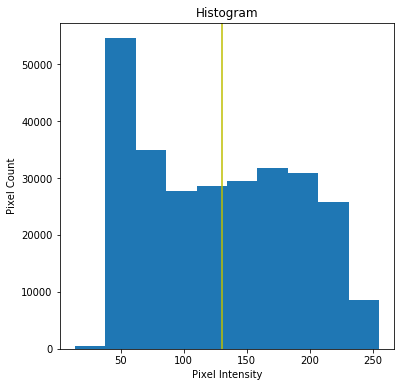

In [56]:
# Don't execute this for threshold_local

fig, ax = plt.subplots(figsize=(6, 6))

ax.hist(cathedral.ravel())

ax.set_title('Histogram')
ax.set_xlabel('Pixel Intensity')
ax.set_ylabel('Pixel Count')

ax.axvline(thresh, color='y')

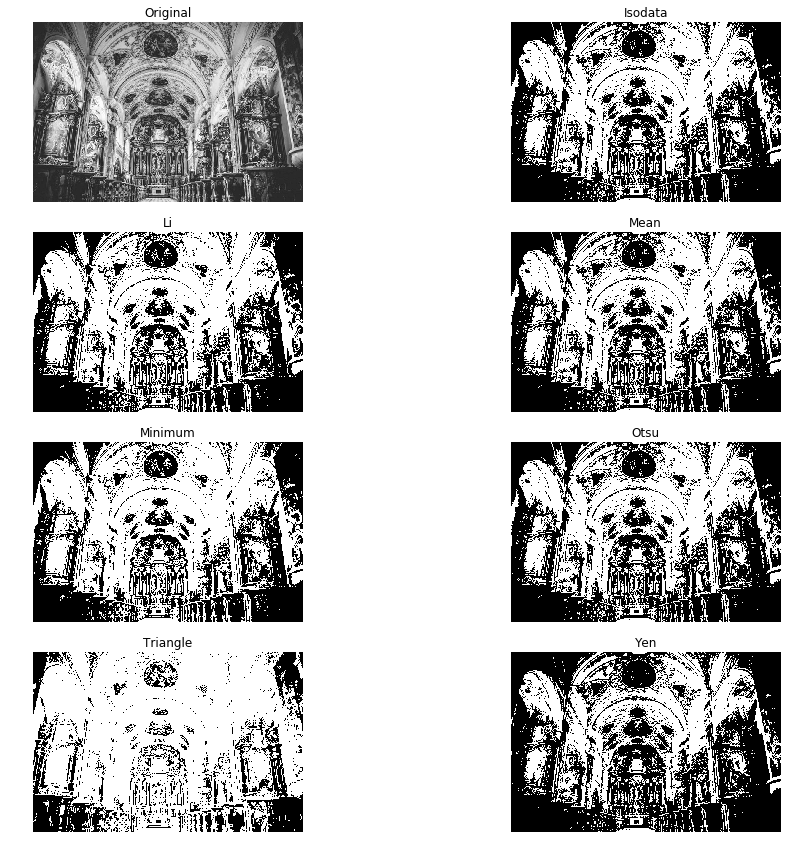

In [58]:
from skimage.filters import try_all_threshold


fig, ax = try_all_threshold(cathedral, figsize=(16, 12), verbose=False)
plt.show()